This project is aimed to create an sophisticated ML algorithm using logistic regression to categorise pyaments to detect whetehr they are fraudulent or not.

Throuhgout this project I will be showcasing learnt techniques to load the data in the form of CSV
Using EDA to critically analyse the data and decide on features and eploit any bias or variance within the dataset.
Then using Schikit-learn to preprocess and split the data.
Fitting the model and the tetsing and evaluating the model to ensure the highest accuracy is achieved whilst maintaining a good balance of not over/underfitting.

In [48]:

#Importing all relevant modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

digital_payment_dataset = pd.read_csv('Digital_Payment_Fraud_Detection_Dataset.csv')
# Displaying the first few rows of the dataset
#print(digital_payment_dataset.head())
#print(digital_payment_dataset.info())
#print(digital_payment_dataset.describe())

# Split into features and target variable
x = digital_payment_dataset.drop('fraud_label', axis=1)
y = digital_payment_dataset['fraud_label']

Splitting the dataset into training and testing splits in order to training the model then use totally unseen data to criticallly analyse its accuracy.

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


I will now carry out some EDA, exploratory data analysis, to visualise the distribution on the dataset

Index(['transaction_id', 'user_id', 'transaction_amount', 'transaction_type',
       'payment_mode', 'device_type', 'device_location', 'account_age_days',
       'transaction_hour', 'previous_failed_attempts',
       'avg_transaction_amount', 'is_international', 'ip_risk_score',
       'login_attempts_last_24h'],
      dtype='object')


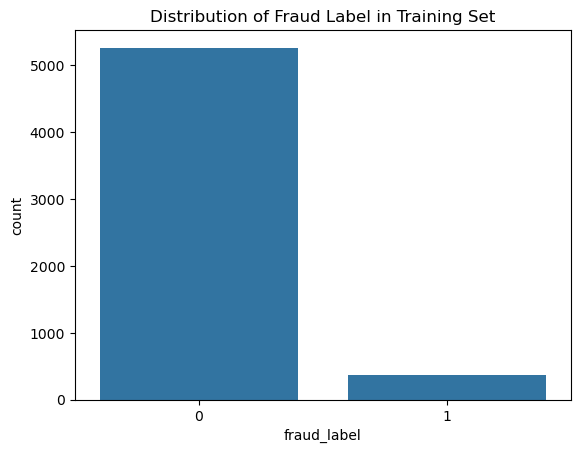

In [26]:
#x_train.shape
#x_train.duplicated().sum()
#x_train.isnull().sum()
# Plot distribution of the target using y_train (target series)
print(x_train.columns)
sns.countplot(x=y_train)
plt.xlabel('fraud_label')
plt.title('Distribution of Fraud Label in Training Set')
plt.show()


In [45]:
#print(x_train.transaction_type.value_counts())
#print(x_train.device_location.value_counts())
print(x_train.dtypes)


transaction_id               object
user_id                      object
transaction_amount          float64
transaction_type             object
payment_mode                 object
device_type                  object
device_location              object
account_age_days              int64
transaction_hour              int64
previous_failed_attempts      int64
avg_transaction_amount      float64
is_international              int64
ip_risk_score               float64
login_attempts_last_24h       int64
dtype: object


Starting to create the pipeline that incoroporates preprocessing and encoding for categorical columns
Then fitting the model to a with scaling and logistic regression model to categorise fraudulent payments

In [ ]:
# Starting to create pipelines but first separting numerical and categorical features
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x_train.select_dtypes(include=['object']).columns


# Creating pipelines for numerical and categorical features

categorical_preprocessing = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_preprocessing = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_preprocessing, numerical_features),
    ('cat', categorical_preprocessing, categorical_features)
])
# Create a pipeline that combines the preprocessor with a logistic regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model on the training data
model.fit(x_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['transaction_amount', 'account_age_days', 'transaction_hour',
       'previous_failed_attempts', 'avg_transaction_amount',
       'is_international', 'ip_risk_score', 'login_attempts_last_24h'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['transaction_id', 'user_id', 'transaction_type', 'payment_mode',
       'device_type', 'device_location'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])